In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it

from matplotlib import cm
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression 
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.regression.linear_model import OLS
from statsmodels.regression.linear_model import RegressionResults

%matplotlib inline

## Assignment 6: model selection and manifold learning

### Exercise 1
* Load the data set from file prostate.csv
* Carry out a best-subset linear regression analysis.
* Compute the AIC, BIC, five- and tenfold cross-validation estimates of prediction error
* Make conclusion

Prostate data info:

Predictors:
* lcavol
* lweight
* age
* lbph
* svi
* lcp
* gleason
* pgg45

outcome:
* lpsa

In [11]:
df = pd.read_csv(open("prostate.csv"))
col = list(df.columns)

#scaling the data
df = scale(df)
df1 = pd.DataFrame(df, columns=col)

In [12]:
X, y = np.asarray(df1)[:, :-1], np.asarray(df1)[:, -1]

#### Best-subset linear regression analysis

In [13]:
col_predictors = col[:-1]

In [14]:
#all subsets
def subsets(N):
    combinations = []
    for k in range(1, N):
        comb = np.array(list(it.combinations(col_predictors, k)))
        combinations.append(comb)
    combinations = np.array(combinations).flatten()

    all_combinations = combinations[0].tolist()
    for i in range(1, len(combinations)):
        all_combinations += combinations[i].tolist()
    all_combinations = np.array(all_combinations)
    return all_combinations

In [22]:
def all_scores(X, y, kfold=True):    
    ols = OLS(y, X)
    result = ols.fit()
    AIC = RegressionResults(ols, result.params).aic
    BIC = RegressionResults(ols, result.params).bic
    if kfold == True:
        fivefold_score = -cross_val_score(LinearRegression(), X, y, scoring="neg_mean_squared_error", cv=5).mean()
        tenfold_score = -cross_val_score(LinearRegression(), X, y, scoring="neg_mean_squared_error", cv=10).mean()
        return AIC, BIC, fivefold_score, tenfold_score
    else:
        return AIC, BIC

In [23]:
all_combinations = subsets(9)

In [24]:
AIC_scores, BIC_scores, fivefold, tenfold = [], [], [], []
for i in range(len(all_combinations)):
    combination = all_combinations[i]
#     print (df1[combination])
    X = np.asarray(df1[combination])
    AIC, BIC, fivefold_score, tenfold_score = all_scores(X, y, kfold=True)
    AIC_scores.append(AIC)
    BIC_scores.append(BIC) 
    fivefold.append(fivefold_score)
    tenfold.append(tenfold_score)
#     print(cv_score)

In [25]:
print(" The best parameters are:\n\n",
      "AIC:", all_combinations[np.argmin(np.abs(AIC_scores))], ", score is: ", np.min(np.abs(AIC_scores)), "\n", 
      "BIC:", all_combinations[np.argmin(np.abs(BIC_scores))], ", score is: ", np.min(np.abs(BIC_scores)), "\n",
      "fivefold:", all_combinations[np.argmin(np.abs(fivefold))], ", score is: ", np.min(np.abs(fivefold)), "\n", 
      "tenfold:", all_combinations[np.argmin(np.abs(tenfold))], ", score is: ", np.min(np.abs(tenfold)))

 The best parameters are:

 AIC: ['lcavol', 'lweight', 'age', 'lbph', 'svi'] , score is:  182.713892633 
 BIC: ['lcavol', 'lweight', 'svi'] , score is:  190.983221133 
 fivefold: ['lcavol', 'lweight', 'age', 'pgg45'] , score is:  0.667301846503 
 tenfold: ['lcavol', 'lweight', 'age', 'pgg45'] , score is:  0.545295089749


In [27]:
aic_subset = np.asarray(df1[all_combinations[np.argmin(np.abs(AIC_scores))]])
cv_score_aic_subset = -cross_val_score(LinearRegression(), aic_subset,
                                       y, scoring="neg_mean_squared_error", cv=5).mean()

bic_subset = np.asarray(df1[all_combinations[np.argmin(np.abs(BIC_scores))]])
cv_score_bic_subset = -cross_val_score(LinearRegression(), bic_subset,
                                       y, scoring="neg_mean_squared_error", cv=5).mean()

print(" cv score for aic subset is:", cv_score_aic_subset, "\n", "cv score for bic subset is:", cv_score_bic_subset)

 cv score for aic subset is: 0.703536818918 
 cv score for bic subset is: 0.667425443862


### Exercise 2
* Apply dimensionality reduction, try PCA, LLE, MDS, Laplacian Eigenmaps and t-SNE. Visualize data set.
* What can you say about clusters in the dataset?
* Build linear regression models using output produced by for different dimensionalities. Compute quality of the models.
* Make conclusion.

## Visualization 

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

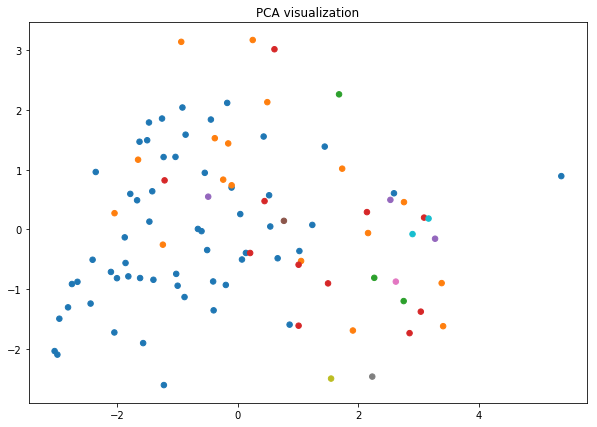

In [29]:
plt.figure(figsize=(10, 7))
colors = [cm.Vega10((y_) / max(y)) for y_ in y]
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, s=30)
plt.title("PCA visualization")

In [30]:
lle = LocallyLinearEmbedding()
X_lle = lle.fit_transform(X)

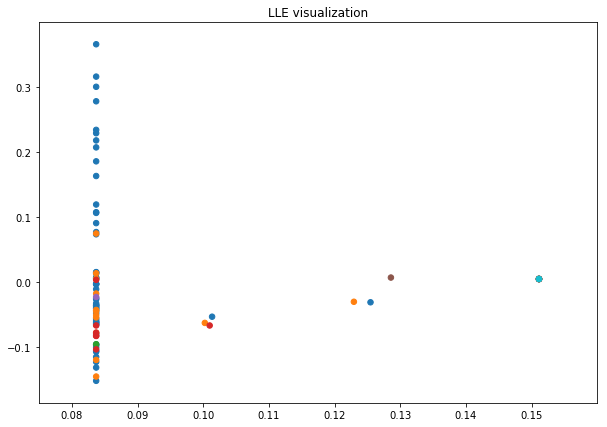

In [31]:
plt.figure(figsize=(10, 7))
colors = [cm.Vega10((y_) / max(y)) for y_ in y]
plt.scatter(X_lle[:,0], X_lle[:,1], c=colors, s=30)
plt.title("LLE visualization")

In [32]:
mds = MDS()
X_mds = mds.fit_transform(X)

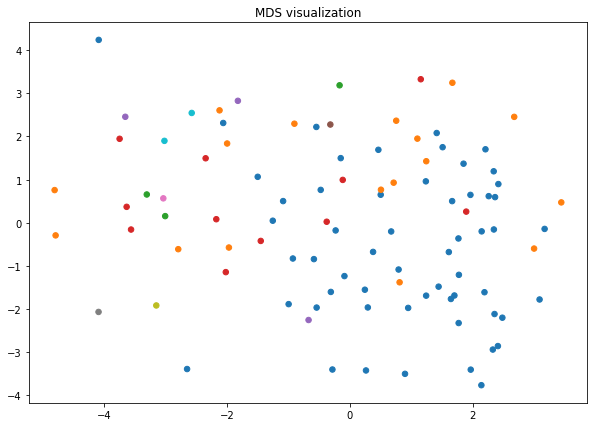

In [33]:
plt.figure(figsize=(10, 7))
colors = [cm.Vega10((y_) / max(y)) for y_ in y]
plt.scatter(X_mds[:,0], X_mds[:,1], c=colors, s=30)
plt.title("MDS visualization")

In [34]:
se = SpectralEmbedding()
X_se = se.fit_transform(X)

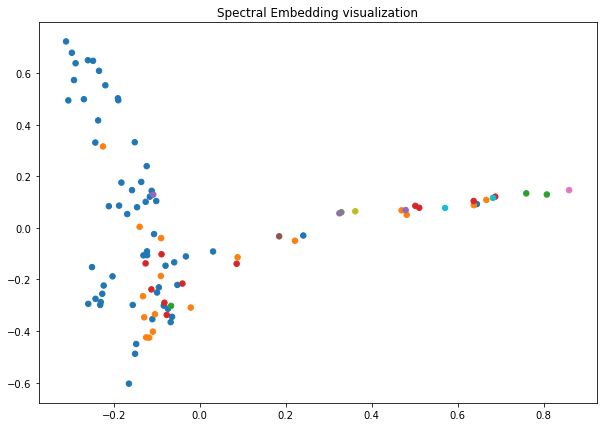

In [35]:
plt.figure(figsize=(10, 7))
colors = [cm.Vega10((y_) / max(y)) for y_ in y]
plt.scatter(X_se[:,0], X_se[:,1], c=colors, s=30)
plt.title("Spectral Embedding visualization")

In [36]:
#it doesn't work -- I have no idea why.
#the error is -- "ValueError: array must not contain infs or NaNs", but the array doesn't contain it

tsne = TSNE()
X_tsne = tsne.fit_transform(X)

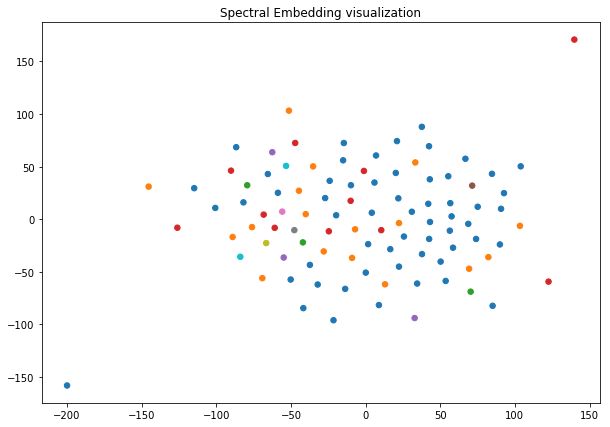

In [37]:
plt.figure(figsize=(10, 7))
colors = [cm.Vega10((y_) / max(y)) for y_ in y]
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=colors, s=30)
plt.title("Spectral Embedding visualization")

I cannot see any clusters. Well, maybe the blue one only.

## Linear regression models using output produced by for different dimensionalities.

In [6]:
models = [PCA(n_components=2), 
          PCA(n_components=3),
          PCA(n_components=5),
          LocallyLinearEmbedding(n_components=2),
          LocallyLinearEmbedding(n_components=3), 
          LocallyLinearEmbedding(n_components=5),
          MDS(n_components=2), 
          MDS(n_components=3), 
          MDS(n_components=5), 
          SpectralEmbedding(n_components=2),
          SpectralEmbedding(n_components=3),
          SpectralEmbedding(n_components=5)]

rows = []
for label in ['PCA', 'LLE', 'MDS', 'SE']:
    for dim in [2, 3, 5]:
        rows.append(label + " dim " + str(dim))
        
dims = [2, 3, 5] * 4
models_labels = ['PCA'] * 3 + ['LLE'] * 3 + ['MDS'] * 3 + ['SE'] * 3
columns = ['AIC score', 'BIC score']

In [14]:
values = np.zeros((12, 2))
values_df = pd.DataFrame(data=values, index=rows, columns=columns)
for i in range(len(models)):
    model, dim = models[i], dims[i]
    X_new = model.fit_transform(X)
    AIC, BIC = all_scores(X_new, y, kfold=False)
    values_df.loc[models_labels[i] + " dim " + str(dim), 'AIC score'] = AIC
    values_df.loc[models_labels[i] + " dim " + str(dim), 'BIC score'] = BIC

In [15]:
values_df

,AIC score,BIC score
PCA dim 2,232.573218,237.722640
PCA dim 3,216.841114,224.565247
PCA dim 5,218.698131,231.571686
LLE dim 2,264.214904,269.364326
LLE dim 3,233.686862,241.410995
LLE dim 5,238.449947,251.323501
MDS dim 2,231.329295,236.478717
MDS dim 3,217.911472,225.635605
MDS dim 5,216.826725,229.700280
SE dim 2,222.096325,227.245747


In [22]:
values_df.min()

AIC score    216.443478
BIC score    224.167611
dtype: float64

I have some problems with package: tSNE doesn't work. I know that it can work sometimes on other computers, so if yours can calculate tSNE transform for this data, please uncomment the code below.

In [40]:
#in case if tSNE worked well for you: uncomment this code please

models = [PCA(n_components=2), 
          PCA(n_components=3),
          PCA(n_components=5),
          LocallyLinearEmbedding(n_components=2),
          LocallyLinearEmbedding(n_components=3), 
          LocallyLinearEmbedding(n_components=5),
          MDS(n_components=2), 
          MDS(n_components=3), 
          MDS(n_components=5), 
          SpectralEmbedding(n_components=2),
          SpectralEmbedding(n_components=3),
          SpectralEmbedding(n_components=5),
          TSNE(n_components=2),
          TSNE(n_components=3),
          TSNE(n_components=5)]

rows = []
for label in ['PCA', 'LLE', 'MDS', 'SE', 'TSNE']:
    for dim in [2, 3, 5]:
        rows.append(label + " dim " + str(dim))
        
dims = [2, 3, 5] * 5
models_labels = ['PCA'] * 3 + ['LLE'] * 3 + ['MDS'] * 3 + ['SE'] * 3 + ['TSNE'] * 3
columns = ['AIC score', 'BIC score']


values = np.zeros((15, 2))
values_df = pd.DataFrame(data=values, index=rows, columns=columns)
for i in range(len(models)):
    model, dim = models[i], dims[i]
    X_new = model.fit_transform(X)
    AIC, BIC = all_scores(X_new, y, kfold=False)
    values_df.loc[models_labels[i] + " dim " + str(dim), 'AIC score'] = AIC
    values_df.loc[models_labels[i] + " dim " + str(dim), 'BIC score'] = BIC

print(values_df)
print(values_df.min())

             AIC score   BIC score
PCA dim 2   216.449256  221.598678
PCA dim 3   195.700509  203.424642
PCA dim 5   194.606969  207.480524
LLE dim 2   262.311559  267.460981
LLE dim 3   262.649111  270.373244
LLE dim 5   263.451989  276.325543
MDS dim 2   218.706342  223.855764
MDS dim 3   196.690769  204.414902
MDS dim 5   194.315712  207.189267
SE dim 2    215.719686  220.869108
SE dim 3    216.127002  223.851135
SE dim 5    218.366230  231.239785
TSNE dim 2  261.943043  267.092465
TSNE dim 3  264.216209  271.940342
TSNE dim 5  258.067688  270.941243
AIC score    194.315712
BIC score    203.424642
dtype: float64


### Conclusion

The best AIC and BIC scores are listed above (I've noticed that the results may change from time to time, so I do not write them exactly). 
However, the result is worse than in the case of combining the different predictors.

In [41]:
print(values_df.min())

AIC score    194.315712
BIC score    203.424642
dtype: float64
